<a href="https://colab.research.google.com/github/Vey27/DeepLearning/blob/main/loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Loan Data Analysis
## Course-end Project 1 out 4 

**DESCRIPTION**
bold text
Create a model that predicts whether or not a loan will be default using the historical data.

**Problem Statement:**  
For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

**Domain**: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

**Content:**
Dataset columns and definition:

**credit.policy:** 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

**purpose:** The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

**int.rate:** The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

**installment:** The monthly installments owed by the borrower if the loan is funded.

**log.annual.inc:** The natural log of the self-reported annual income of the borrower.

**dti:** The debt-to-income ratio of the borrower (amount of debt divided by annual income).

**fico**: The FICO credit score of the borrower.

**days.with.cr.line:** The number of days the borrower has had a credit line.

**revol.bal:** The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

**revol.util:** The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

**inq.last.6mths:** The borrower's number of inquiries by creditors in the last 6 months.

**delinq.2yrs:** The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

**pub.rec:** The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

 
**Steps to perform:**
Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

Tasks:

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

In [147]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving loan_data.csv to loan_data (3).csv
User uploaded file "loan_data.csv" with length 751253 bytes


In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

import pandas as pd, joblib

import warnings
warnings.filterwarnings('ignore')

In [149]:

df_loan.describe()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,1.944038,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,1.686881,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,6.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


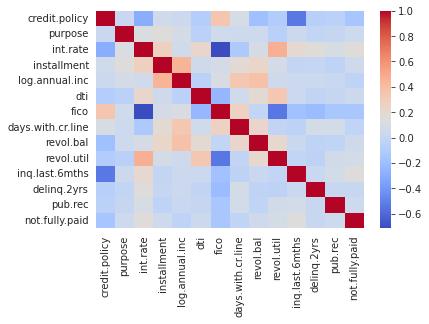

In [150]:
# Visualize the correlation coefficient between various variables using Heatmap
coRR = df_loan.corr(method='pearson')
coRR
map = sns.heatmap(coRR, cmap='coolwarm')
plt.show()

# Observation:
From the above Heatmap, it is concluded that all the features are important and needs to be considered for building the model


# 1.     Feature Transformation

In [151]:
# Check for unique values in the column 'purpose'
df_loan.purpose.unique()


array([2, 1, 0, 4, 6, 5, 3])

In [152]:
# The column 'purpose' is categorical. Converting the data into numeric
# Label Encoding ---> Create Dummy Variables for Column 'Purpose'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_loan['purpose'] = le.fit_transform(df_loan['purpose'])
df_loan

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [153]:
df_loan.shape

(9578, 14)

In [154]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int64  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 1.0 MB


In [155]:
df_loan.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
purpose,9578.0,1.944038,1.686881,0.000000,1.000000,2.000000,2.000000,6.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02


In [156]:
df = df_loan.drop_duplicates()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int64  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 1.1 MB


In [157]:
# check for Null values, if any 
df.isnull().any()


credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

In [158]:
# Check whether the dataset is balanced or unbalanced
df['credit.policy'].value_counts()


1    7710
0    1868
Name: credit.policy, dtype: int64

# 2.     Exploratory data analysis of different factors of the dataset.
Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.



Text(0.5, 0, 'FICO')

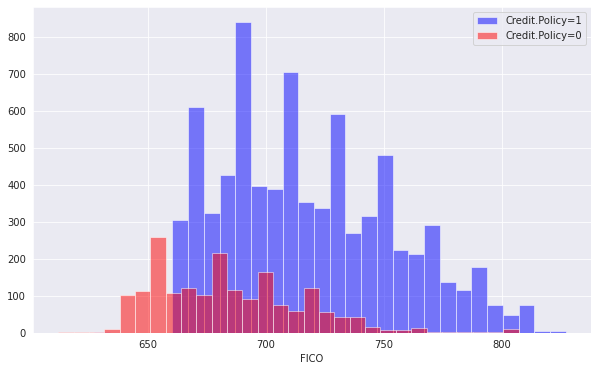

In [159]:
# Creating a histogram
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue', bins=30,
 label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red', bins=30,
 label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')


Create a similar figure; select the not.fully.paid column

Text(0.5, 0, 'FICO')

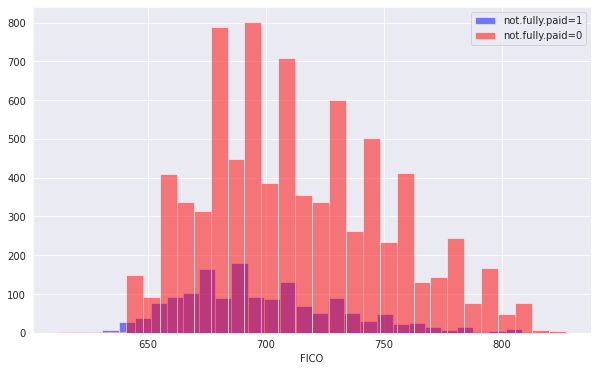

In [160]:

plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
 bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
 bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Create a countplot using seaborn showing the counts of loans by purpose with the hue defined by not.fully.paid.


<AxesSubplot:xlabel='purpose', ylabel='count'>

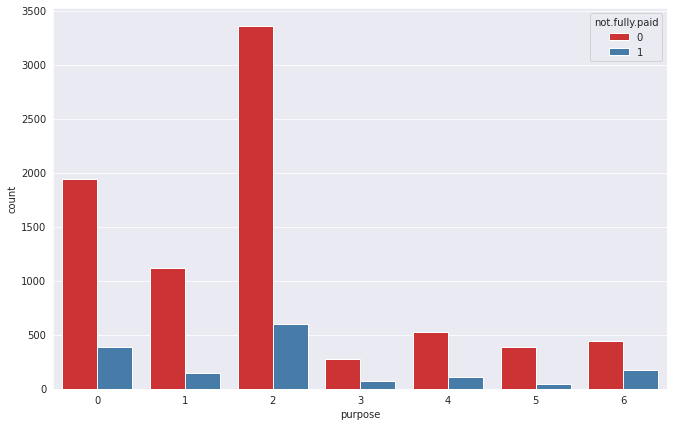

In [161]:
 #Creating countplot
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')


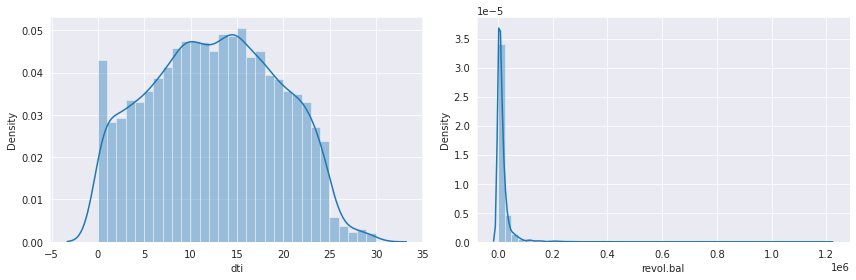

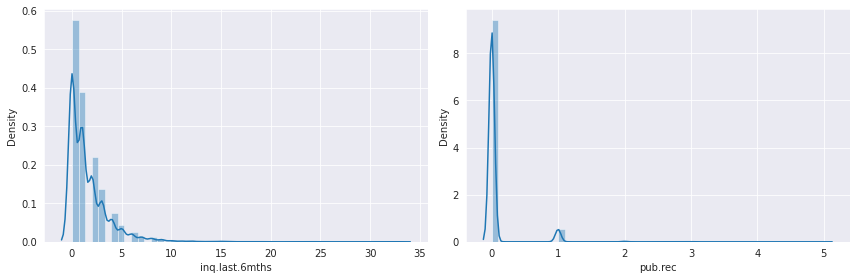

In [162]:
num_cols = ['dti','revol.bal', 'inq.last.6mths', 'pub.rec']
for i in range(0,len(num_cols),2):
 plt.figure(figsize=(12,4))
 plt.subplot(121)
 sns.distplot(df[num_cols[i]], hist=True, kde=True)
 plt.subplot(122) 
 sns.distplot(df[num_cols[i+1]], hist=True, kde=True)
 plt.tight_layout()
 plt.show()


# Observations:
1.   This borrower's income is same as debt, no money left over end of the month. 
2.   Decrease amount of unpaid at the end of the credit card billing cycle.
3.   The last six months reduced in borrower of inquiries by creditors
4.   Short spike, but was able to make payments, no frequency of deogatory public records. 













<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

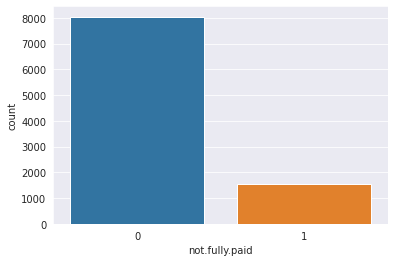

In [163]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df)

# Check the label “no.fully.paid” distribution in the dataset.


The data is imblance the predication will be biased since
“not.fully.paid =0 “ has 83.9% filled, and only 16% is the “not.fully.paid=1”

In [164]:
df['not.fully.paid'].isnull().mean()
df.groupby('not.fully.paid')['not.fully.paid'].count()/len(df)

not.fully.paid
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

# 3.     Additional Feature Engineering


Text(0.5, 0, 'FICO')

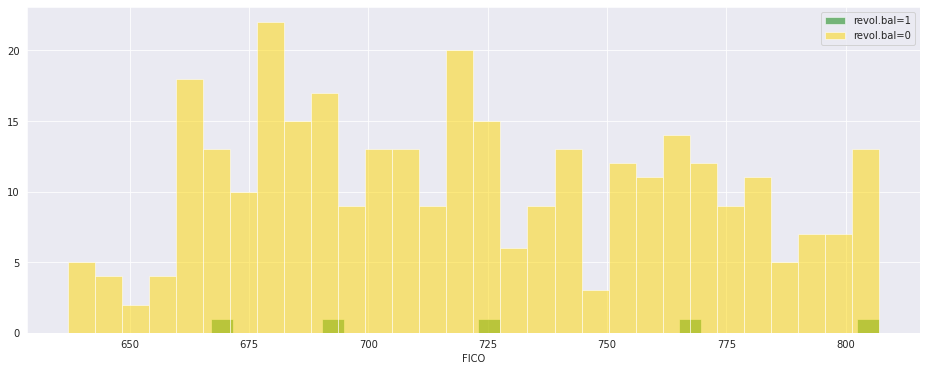

In [165]:
plt.figure(figsize=(16,6))
df_loan[df_loan['revol.bal']==1]['fico'].hist(alpha=0.5,color='green',bins=30,label='revol.bal=1')
df_loan[df_loan['revol.bal']==0]['fico'].hist(alpha=0.5,color='gold',bins=30,label='revol.bal=0')
plt.legend()
plt.xlabel('FICO')


<Figure size 792x504 with 0 Axes>

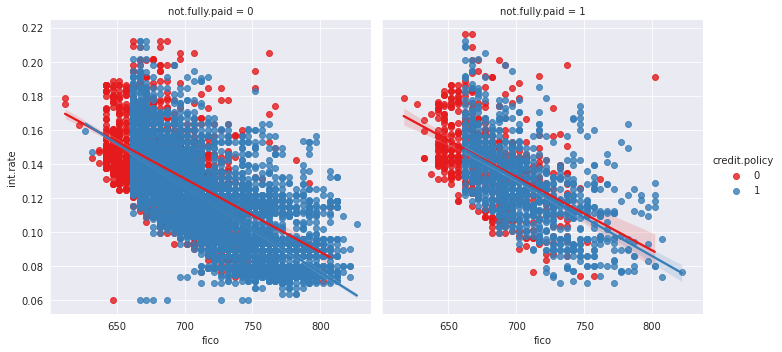

In [166]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

**revol.bal:** The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

# Setting Up the Data
Create a list of elements containing the string purpose. Name this list cat_feats.


In [167]:
cat_feats = ['purpose']



Use pd.get_dummies (loans,columns=cat_feats,drop_first=True) to create a fixed and larger data frame that has new feature
columns with dummy variables. Name this data frame final_data.


In [168]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)
final_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   int.rate           9578 non-null   float64
 2   installment        9578 non-null   float64
 3   log.annual.inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days.with.cr.line  9578 non-null   float64
 7   revol.bal          9578 non-null   int64  
 8   revol.util         9578 non-null   float64
 9   inq.last.6mths     9578 non-null   int64  
 10  delinq.2yrs        9578 non-null   int64  
 11  pub.rec            9578 non-null   int64  
 12  not.fully.paid     9578 non-null   int64  
 13  purpose_1          9578 non-null   uint8  
 14  purpose_2          9578 non-null   uint8  
 15  purpose_3          9578 non-null   uint8  
 16  purpose_4          9578 

# Train-Test Split

**Distribute** the data into training and test datasets using the train_test_split() function.


In [169]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [170]:
import sklearn as sk 


In [171]:
from sklearn.model_selection import train_test_split


In [172]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

Training Decision Tree Model

In [173]:
# Decision tree model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)


DecisionTreeClassifier()

# Evaluating Decision Tree
Create a classification report for the DecisionTreeClassifier

In [174]:
# Classification report
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.21      0.25      0.23       443

    accuracy                           0.73      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.76      0.73      0.75      2874



# Confusion Matrix


In [175]:
# Creating a confusion matrix
print(confusion_matrix(y_test,predictions))

[[2001  430]
 [ 332  111]]



Training Random Forest Model this is part of Machine Learning previous course using RandomForestClassifier for sklearn.ensemble

In [176]:
# Random forest model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=600)

# Evaluating Random Forest Model
A classification report for the RandomForestClassifier 

In [177]:
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.41      0.02      0.03       443

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.47      2874
weighted avg       0.78      0.84      0.78      2874



# Printing the Confusion Matrix


In [178]:
print(confusion_matrix(y_test,predictions))


[[2421   10]
 [ 436    7]]


# Conclusion; From the above use case, the accuracy of random forest is better than decision tree from Machine Learning method evalution. 


# 4.     Modeling

In [179]:
# define features and label
features = df.iloc[:,1:]
label = df.iloc[:,[0]]


In [180]:
features

,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [181]:
label

,credit.policy
0,1
1,1
2,1
3,1
4,1
...,...
9573,0
9574,0
9575,0
9576,0


In [182]:
# Standardization
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
features = Scaler.fit_transform(features)
features


array([[ 0.03317632, -0.13931753,  2.46309947, ..., -0.29973008,
        -0.23700318, -0.43652393],
       [-0.55966463, -0.57886837, -0.43885443, ..., -0.29973008,
        -0.23700318, -0.43652393],
       [ 0.03317632,  0.48648368,  0.23070836, ..., -0.29973008,
        -0.23700318, -0.43652393],
       ...,
       [ 0.03317632, -0.57886837, -1.06867038, ..., -0.29973008,
        -0.23700318,  2.29082517],
       [ 1.2188582 ,  1.39166043,  0.1569135 , ..., -0.29973008,
        -0.23700318,  2.29082517],
       [ 0.03317632,  0.61685894,  2.58060136, ..., -0.29973008,
        -0.23700318,  2.29082517]])

# Starting our Final Model

In [183]:
# Starting our Final Model
# Recursive Feature Elimination (RFE ) Technique
# Initialize the model algorithm
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
# Apply RFE to model (All features and labels)
from sklearn.feature_selection import RFE
selectFeaturesFromRFE = RFE(estimator=modelLR,
 step=1) 
# Fit the data with RFE
selectFeaturesFromRFE.fit(features,label)
# Get Features with High Ranking (1,2,3,4,...) (Get features that has Rank 1. Sometimes Rank 2 is considered)
print(selectFeaturesFromRFE.ranking_)


[4 1 2 1 7 1 5 1 1 1 6 8 3]


# Observation:
The features 'int.rate', 'log.annual.inc', 'fico', 'revol.bal', 'revol.util' and 'inq.last.6mths' are 
selected for model building 


In [184]:
# Select by Model (SBM)
# 1. Initialize the model algorithm
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
# 2. Apply SBM to model (All features and labels)
from sklearn.feature_selection import SelectFromModel
selectFeaturesFromSBM = SelectFromModel(modelLR) 
# Fit the data with SBM
selectFeaturesFromSBM.fit(features,label)
# 3. Get Features with High Ranking (1,2,3,4,...) (Get features that has Rank 1. Sometimes Rank 2 is considered
print(selectFeaturesFromSBM.get_support())


[False False False False False  True False  True False  True False False
 False]


# Observation:
The features 'fico', 'revol.bal' and 'inq.last.6mths' are selected for model building


In [185]:
finalFeatures=features[:,[2,4,6,8,9,10]]


In [186]:
import tensorflow as tf


In [187]:
seed = 2501
X_train,X_test,y_train,y_test = train_test_split(finalFeatures,
                                                label,
                                                test_size=0.2,
                                                random_state = seed)
tf.random.set_seed(seed)
np.random.seed(seed)


In [188]:
#Architect the model
model = tf.keras.models.Sequential()
# units ---> How many neurons/nodes needs to initialized?
# Option1: No of units ---> No of features
# Option2: No of units ---> 3 * No of features (3*6=18)
# Option3: No of units ---> 1/3 * No of features
model.add(tf.keras.layers.Dense( units = 18, activation= 'relu',input_shape=(6,) ))
model.add(tf.keras.layers.Dense( units = 18, activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 18, activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))


In [189]:
# Compile Model
# Binary Classification : binary_crossentropy
# MultiClass (Label) Classification: categorical_crossentropy
model.compile(optimizer = "Adam" , 
 loss = 'binary_crossentropy', 
 metrics = ['accuracy'])


In [196]:
# Custom EarlyStopping Code
class thresholdCallback(tf.keras.callbacks.Callback):
   def __init__(self, cl):
      super(thresholdCallback, self).__init__()
      self.cl = cl
 
   def on_epoch_end(self, epoch, logs=None):
        test_score = logs["val_accuracy"]
        train_score = logs["accuracy"]
        if ( test_score > train_score and test_score > self.cl ) or test_score == 1 :
                  self.model.stop_training = True

# Train the final MODEL 

In [197]:
# Train the model
scoreMonitor = thresholdCallback(cl=0.9)
epoch_hist = model.fit(X_train,
                        y_train,
                        epochs=300,
                        validation_data=(X_test,y_test),
                        callbacks= [scoreMonitor] )


Epoch 1/300
240/240 [==============================] - 2s 3ms/step - loss: 0.4238 - accuracy: 0.8524 - val_loss: 0.3288 - val_accuracy: 0.8883
Epoch 2/300
240/240 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8898 - val_loss: 0.3102 - val_accuracy: 0.8914
Epoch 3/300
240/240 [==============================] - 1s 2ms/step - loss: 0.2989 - accuracy: 0.8926 - val_loss: 0.3017 - val_accuracy: 0.8914
Epoch 4/300
240/240 [==============================] - 1s 3ms/step - loss: 0.2858 - accuracy: 0.8939 - val_loss: 0.2913 - val_accuracy: 0.8909
Epoch 5/300
240/240 [==============================] - 1s 3ms/step - loss: 0.2771 - accuracy: 0.8966 - val_loss: 0.2880 - val_accuracy: 0.8925
Epoch 6/300
240/240 [==============================] - 1s 3ms/step - loss: 0.2713 - accuracy: 0.9012 - val_loss: 0.2864 - val_accuracy: 0.8925
Epoch 7/300
240/240 [==============================] - 1s 3ms/step - loss: 0.2658 - accuracy: 0.9022 - val_loss: 0.2812 - val_accuracy: 0.8993

In [199]:
# Validate the model
# Since the dataset is an UNBALANCED DATASET , it is recommended to perform one more check,
# Domainwise Tolerance !!! or F1 Score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Prediction
predLabel= (model.predict(finalFeatures) > 0.5).astype("int32")
confusion_matrix(label,predLabel)

300/300 [==============================] - 0s 1ms/step


array([[1455,  413],
       [ 206, 7504]])

# Observation:
Considering the average of (Recall of 1 and Precision of 0) (0.98+0.88)/2 = 0.93 
Since the value 0.93 > CL 0.92, the model is Accepted